 # <span style=color:purple>**S05 T01: Tasca mètodes de mostreig**</span>
 
 _**OBJETIVOS DE LA ACTIVIDAD**_
 
 * Aprender a realizar muestreo aleatorio sobre datos en Python
 * Aprender a seleccionar metodologías de muestreo que disminuyan las posibilidades de introducis bias al estudio que puedan afectar la fiabilidad de los resultados
 
 

In [1]:
import pandas as pd
from random import randint
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification

_**DATOS A UTILIZAR**_

Los datos hacen referencia a los lanzamientos realizados por los jugadores de la NBA durante la temporada de 2014-2015. Entre los datos recolectados se contempla información como: quien tomo el lanzamiento, en que parte de la cancha se tomó el lanzamiento, que defensor estaba mas cercano y así una serie de información complementaria referente a cada lanzamiento. 

In [2]:
sport_df = pd.read_csv ('Data\shot_logs.csv', sep = ',')

In [3]:
sport_df.head()

,GAME_ID1,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
sport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID1                    128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

 #### <span style=color:purple>**EJERCICIO 1**</span>
 
 Realización de muestreo aleatorio simple y muestreo aleatorio sistemático sobre los datos
 
 **1.1 Muestreo Aleatorio Simple (mas)**

Sobre una población total de 128.069 muestras aplicaremos un algoritmo de selección aleatoria en el cual todos las muestras de la población tienen la misma probabilidad de ser seleccionada. 

Seleccionaremos un total de 12.800 muestras para formar nuestro subset de muestreo, correcpondiente aproximadamente al 10% de la población total

In [5]:
sample_mas_df = sport_df.sample (12800)

In [6]:
sample_mas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12800 entries, 24197 to 65453
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_ID1                    12800 non-null  int64  
 1   MATCHUP                     12800 non-null  object 
 2   LOCATION                    12800 non-null  object 
 3   W                           12800 non-null  object 
 4   FINAL_MARGIN                12800 non-null  int64  
 5   SHOT_NUMBER                 12800 non-null  int64  
 6   PERIOD                      12800 non-null  int64  
 7   GAME_CLOCK                  12800 non-null  object 
 8   SHOT_CLOCK                  12225 non-null  float64
 9   DRIBBLES                    12800 non-null  int64  
 10  TOUCH_TIME                  12800 non-null  float64
 11  SHOT_DIST                   12800 non-null  float64
 12  PTS_TYPE                    12800 non-null  int64  
 13  SHOT_RESULT                

 **1.2 Muestreo Sistemático (ms)**

Hay muchas maneras de hacer un muestreo sistematico, en este caso utilizaremos la metodologia mas común. Para tal fin se siguen los siguientes pasos:

* Paso 1: Organizar las muestras. En nuestro caso utilizaremos el indice como organizador
* Paso 2: Seleccionar de forma aleatoria el indice de inicio del muestreo. Para este paso nos apoyaremos en la funcion de Python random. Marcaremos un intervalo de trabajo y de forma automática se seleccionará el indice
* Paso 3:  Generar el nuevo df con valor original seleccionado de forma aleatoria y muestras siguientes seleccionadas con un intervalo aleatorio 


In [7]:
start_sample = randint(0,100)

In [8]:
interval = randint(5,10)

In [9]:
sample_ms_df = sport_df.iloc[start_sample::interval]

In [10]:
sample_ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21329 entries, 98 to 128066
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_ID1                    21329 non-null  int64  
 1   MATCHUP                     21329 non-null  object 
 2   LOCATION                    21329 non-null  object 
 3   W                           21329 non-null  object 
 4   FINAL_MARGIN                21329 non-null  int64  
 5   SHOT_NUMBER                 21329 non-null  int64  
 6   PERIOD                      21329 non-null  int64  
 7   GAME_CLOCK                  21329 non-null  object 
 8   SHOT_CLOCK                  20398 non-null  float64
 9   DRIBBLES                    21329 non-null  int64  
 10  TOUCH_TIME                  21329 non-null  float64
 11  SHOT_DIST                   21329 non-null  float64
 12  PTS_TYPE                    21329 non-null  int64  
 13  SHOT_RESULT                 2

 #### <span style=color:purple>**EJERCICIO 2**</span>
 
 Realización de Muestra Estratificada y SMOTE (Synthetic Minority Oversampling Technique)
 
 **2.1 Muestra Estratificada (me)**
 
 Para este tipo de muestreo nos apoyaremos en la herramienta de sklearn 'train_test_split'. Con esta función podemos generar un df de muestra (test) haciendo una estratificación, en este caso por los puntos del lanzamiento que se tomó. De esta manera los porcentajes de lanzamientos de 2 y 3 puntos del dataFrame de test serán muy similares a los del dataFrame original.
 
 Para mantener correlación con los ejercicios anteriores, generamos un set de prueba del 10% del DataFrame original



In [11]:
df_train, sample_me_df = train_test_split(sport_df, test_size = 0.1, stratify = sport_df['PTS_TYPE'])

In [12]:
sample_me_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12807 entries, 28644 to 71871
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_ID1                    12807 non-null  int64  
 1   MATCHUP                     12807 non-null  object 
 2   LOCATION                    12807 non-null  object 
 3   W                           12807 non-null  object 
 4   FINAL_MARGIN                12807 non-null  int64  
 5   SHOT_NUMBER                 12807 non-null  int64  
 6   PERIOD                      12807 non-null  int64  
 7   GAME_CLOCK                  12807 non-null  object 
 8   SHOT_CLOCK                  12216 non-null  float64
 9   DRIBBLES                    12807 non-null  int64  
 10  TOUCH_TIME                  12807 non-null  float64
 11  SHOT_DIST                   12807 non-null  float64
 12  PTS_TYPE                    12807 non-null  int64  
 13  SHOT_RESULT                

 **2.2 SMOTE - Synthetic Minority Oversampling Technique (smot)**
 
 El proposito de este tipo de metodos es crear de forma sitetica muestras que permitan balancear un DataSet. Para que la aplicación tenga sentido se debería fijar un target dentro del DataSet y verificar que en efecto hay un desbalance considerable entre los posibles resultados. Esto quiere decir, tener unos valores target que representen mas del 95%, por ejemplo, y otro que represente menos del 5%. Al aplicar la técnica de SMOTE se consigue crear de forma artificial mas valores del target menos presente y conseguir un algoritmo predictivo mas preciso.
 
 En este caso graficaremos algunas columnas para verificar si hay algúna con un desbalance significativo y poder aplicar el SMOTE a esa columna. SIn embargo, el target mas significativo sería poder predecir si el tiro es encestado o no en función al resto de parámetros, por lo que el primer gráfico sería el de Shot Results.
 
 <span style=color:blue>GRAFICO 1 - SHOT RESULT</span>
 


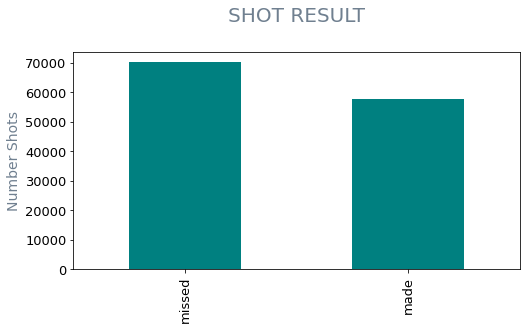

In [13]:
graph = sport_df['SHOT_RESULT'].value_counts().plot(kind='bar', figsize=(8, 4), fontsize=13, color='teal')

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 12}

graph.set_title('SHOT RESULT', size=20, pad=30, fontdict = fuente_titulo)
graph.set_ylabel('Number Shots', fontsize=14, fontdict = fuente_ejes)

plt.show()

Vemos que el gráfico esta bastante bien balanceado. Graficaremos otra columna de variables categóricas para ver si conseguimos un targuet desbalanceado. Si no lo conseguimos, aplicaremos el SMOTE a la columna de Shot Result que es un targuet interesante de predecir.


<span style=color:blue>GRAFICO 2 - WIN / LOSS </span>

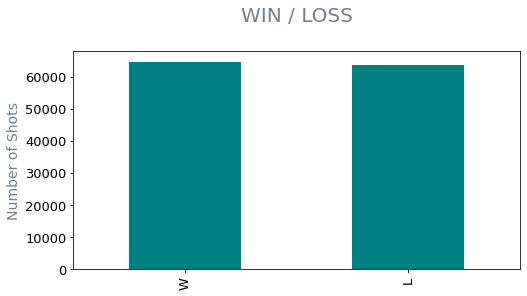

In [14]:
graph = sport_df['W'].value_counts().plot(kind='bar', figsize=(8, 4), fontsize=13, color='teal')

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 12}

graph.set_title('WIN / LOSS', size=20, pad=30, fontdict = fuente_titulo)
graph.set_ylabel('Number of Shots', fontsize=14, fontdict = fuente_ejes)

plt.show()

Igualmente vemos que las variables están bastante equilibradas. Para efectos de mostrar los resultados del SMOTE aplicaremos el algoritmo considerando como target la columna de Shot_Result.


**_Consideración_**

Antes de aplicar el SMOTE tenemos que asegurarnos que las columnas que seleccionemos del DF sean valores numéricos, y pasar el las variables target a 0 y 1.

* Seleccionamos algunas columnas numéricas del df y aseguramos que los valores NaN sean reemplazados por 0
* Reemplazamos la categoría 'made' por 1 y 'missed' por 0 en la columna del df 'SHOT_RESULT'
* Aaplicamos el algoritmo de SMOTE para equilibrar las categorías de la columna de SHOT_RESULT
* Graficamos para verificar que las variables categóricas tienen tamaños similares

In [61]:
X = sport_df [['FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','SHOT_DIST','SHOT_RESULT']].fillna(0)
X['SHOT_RESULT'].replace('made', 1, inplace = True)
X['SHOT_RESULT'].replace('missed', 0, inplace = True)

y = X['SHOT_RESULT']


In [64]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

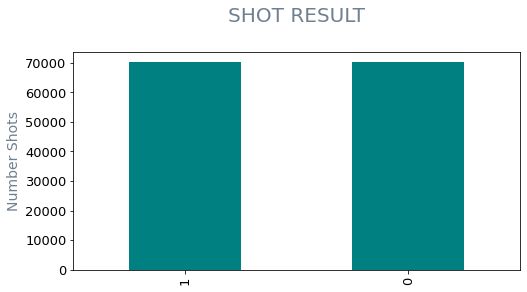

In [65]:
graph = X_sm['SHOT_RESULT'].value_counts().plot(kind='bar', figsize=(8, 4), fontsize=13, color='teal')

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'slategrey', 'size' : 12}

graph.set_title('SHOT RESULT', size=20, pad=30, fontdict = fuente_titulo)
graph.set_ylabel('Number Shots', fontsize=14, fontdict = fuente_ejes)

plt.show()

**Las categorías de la columna target se han equilibrado mediante la generación de valores sintéticos con el algoritmo de SMOTE**

**1 : 'made'**

**0 : 'missed'**

